# Model Training

## 1. Import Required Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE, RandomOverSampler
import warnings

## 2. Import Data

### 2.1 Imbalanced Datasets

In [2]:
X_train = np.load("data/Original/X_train.npy")
y_train = np.load("data/Original/y_train.npy")
X_val = np.load("data/Original/X_val.npy")
y_val = np.load("data/Original/y_val.npy")

In [3]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((208480, 67), (208480,), (52121, 67), (52121,))

### 2.2 Undersampled Datasets

In [4]:
X_train_under_sample = np.load("data/UnderSampling/X_train_undersample.npy")
y_train_under_sample = np.load("data/UnderSampling/y_train_undersample.npy")

### 2.3 Oversampled Datasets

In [5]:
X_train_over_sample = np.load("data/OverSampling/X_train_oversample.npy")
y_train_over_sample = np.load("data/OverSampling/y_train_oversample.npy")

### 2.4 SMOTE Datasets

In [6]:
X_train_smote = np.load("data/SMOTE/X_train_smote.npy")
y_train_smote = np.load("data/SMOTE/y_train_smote.npy")

### Create an Evaluation function to give all metrics after model Training

#### GLOBAL VARIABLES

In [7]:
RANDOM_SEED = 42
MODELS = {
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "DecisionTree Classifier": DecisionTreeClassifier(),
}

In [8]:
def plot_confusion_matrix(true, predicted, test=False):
    """
    Generate the confusion matrix and classification report
    """
    if test:
        cm = confusion_matrix(true, predicted)
        cr = classification_report(true, predicted)
        conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:1','Predicted:2','Predicted:3'],
                                             index=['Actual:1','Actual:2','Actual:3'])
        # confusion matrix in heatmap
        sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix')
        plt.show()
        print(cr) 
    f1_micro = f1_score(true, predicted, average='micro')
    return f1_micro

## Model Training

In [11]:
def evaluate_model(true, predicted, test=False):
    """
    Generate the confusion matrix and classification report
    """
    if test:
        cm = confusion_matrix(true, predicted)
        cr = classification_report(true, predicted)
        conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:1','Predicted:2','Predicted:3'],
                                             index=['Actual:1','Actual:2','Actual:3'])
        # confusion matrix in heatmap
        sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix')
        plt.show()
        print(cr) 
    f1_micro = f1_score(true, predicted, average='micro')
    return f1_micro

In [9]:
def train_and_evaluate(X_train, y_train):    
    model_list = []
    f1_micro_train = []
    f1_micro_val = []
    time_taken = []
    
    for i in range(len(MODELS)):
        
        model = list(MODELS.values())[i]
        
        # start time
        start_time = time.time()
        
        model.fit(X_train, y_train)
        
        # end time
        end_time = time.time()

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_val_pred = model.predict(X_val)

        # Evaluate Train and Validation dataset
        model_train_f1 = evaluate_model(y_train, y_train_pred)
        model_val_f1 = evaluate_model(y_val, y_val_pred, test=True)

        print(list(MODELS.keys())[i])
        model_list.append(list(MODELS.keys())[i])

        print("Model Performance for Training Set")
        print("F1 Micro-Averaged Score: {:.4f}".format(model_train_f1))
        print("--------------------------------------")

        print("Model Performance for Validation Set")
        print("F1 Micro-Averaged Score: {:.4f}".format(model_val_f1))
        
        f1_micro_train.append(model_train_f1)
        f1_micro_val.append(model_val_f1)
        time_ellapsed = np.round(end_time - start_time, 2)
        time_taken.append(time_ellapsed)
        
        print('='*35)
        print('\n')
    results = pd.DataFrame(list(zip(model_list, f1_micro_train, f1_micro_val, time_taken)), 
                           columns=['Model Name', 'Train Micro Averaged F1-Score', 'Val Micro Averaged F1-Score', 'Time']).sort_values(by=["Val Micro Averaged F1-Score"],ascending=False)
    return results

### 1. For Imbalanced Datasets

#### Train the models

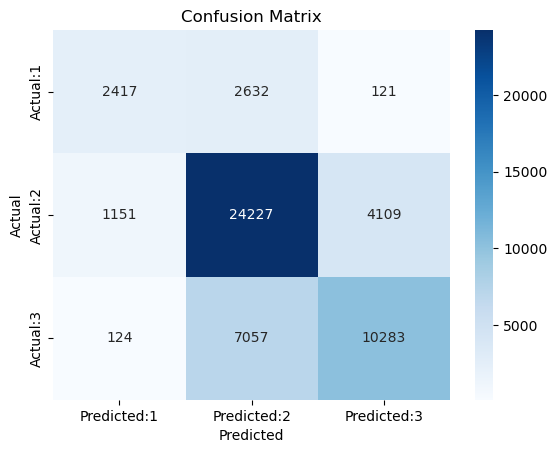

              precision    recall  f1-score   support

           1       0.65      0.47      0.55      5170
           2       0.71      0.82      0.76     29487
           3       0.71      0.59      0.64     17464

    accuracy                           0.71     52121
   macro avg       0.69      0.63      0.65     52121
weighted avg       0.71      0.71      0.70     52121

Random Forest
Model Performance for Training Set
F1 Micro-Averaged Score: 0.9825
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.7085




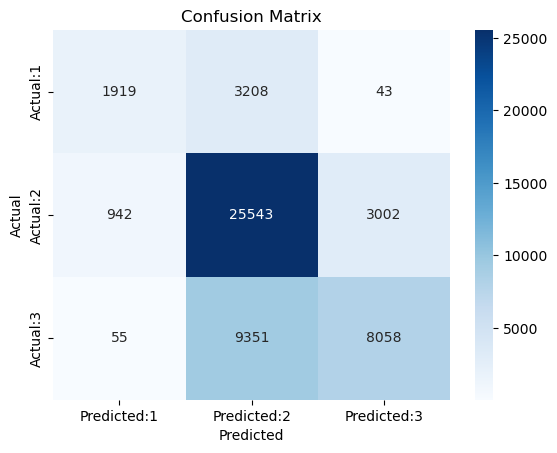

              precision    recall  f1-score   support

           1       0.66      0.37      0.47      5170
           2       0.67      0.87      0.76     29487
           3       0.73      0.46      0.56     17464

    accuracy                           0.68     52121
   macro avg       0.68      0.57      0.60     52121
weighted avg       0.69      0.68      0.66     52121

Gradient Boosting Classifier
Model Performance for Training Set
F1 Micro-Averaged Score: 0.6820
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.6815




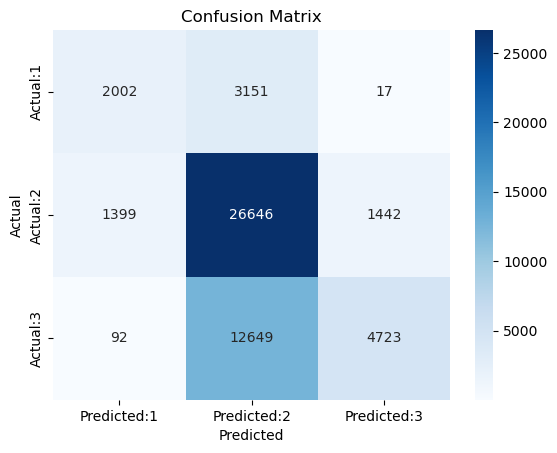

              precision    recall  f1-score   support

           1       0.57      0.39      0.46      5170
           2       0.63      0.90      0.74     29487
           3       0.76      0.27      0.40     17464

    accuracy                           0.64     52121
   macro avg       0.65      0.52      0.53     52121
weighted avg       0.67      0.64      0.60     52121

AdaBoost Classifier
Model Performance for Training Set
F1 Micro-Averaged Score: 0.6420
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.6403




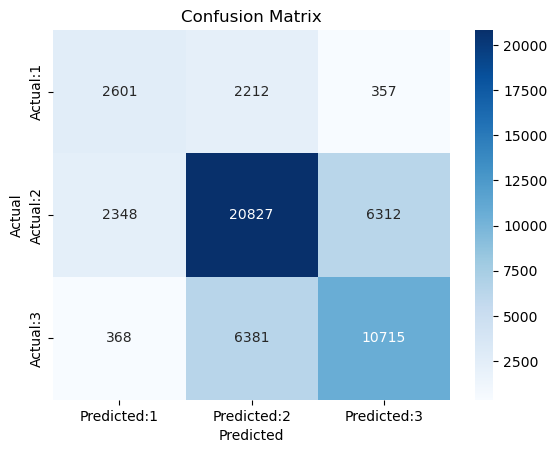

              precision    recall  f1-score   support

           1       0.49      0.50      0.50      5170
           2       0.71      0.71      0.71     29487
           3       0.62      0.61      0.61     17464

    accuracy                           0.66     52121
   macro avg       0.60      0.61      0.61     52121
weighted avg       0.66      0.66      0.66     52121

DecisionTree Classifier
Model Performance for Training Set
F1 Micro-Averaged Score: 0.9826
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.6551




In [12]:
results_imbalanced_datasets = train_and_evaluate(X_train, y_train)

#### Results

In [13]:
results_imbalanced_datasets

,Model Name,Train Micro Averaged F1-Score,Val Micro Averaged F1-Score,Time
0,Random Forest,0.982540,0.708486,58.45
1,Gradient Boosting Classifier,0.681993,0.681491,339.01
3,DecisionTree Classifier,0.982559,0.655072,4.16
2,AdaBoost Classifier,0.641975,0.640260,26.46


### 2. For undersampled Datasets

#### Train the models

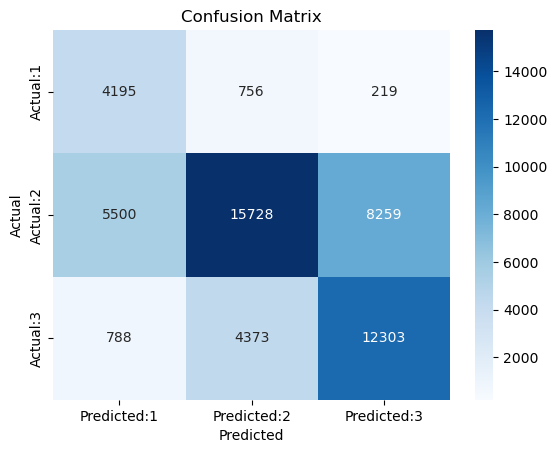

              precision    recall  f1-score   support

           1       0.40      0.81      0.54      5170
           2       0.75      0.53      0.62     29487
           3       0.59      0.70      0.64     17464

    accuracy                           0.62     52121
   macro avg       0.58      0.68      0.60     52121
weighted avg       0.66      0.62      0.62     52121

Random Forest
Model Performance for Training Set
F1 Micro-Averaged Score: 0.9938
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.6183




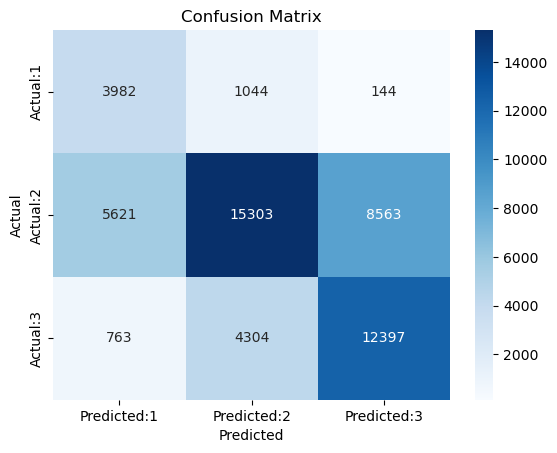

              precision    recall  f1-score   support

           1       0.38      0.77      0.51      5170
           2       0.74      0.52      0.61     29487
           3       0.59      0.71      0.64     17464

    accuracy                           0.61     52121
   macro avg       0.57      0.67      0.59     52121
weighted avg       0.65      0.61      0.61     52121

Gradient Boosting Classifier
Model Performance for Training Set
F1 Micro-Averaged Score: 0.6745
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.6079




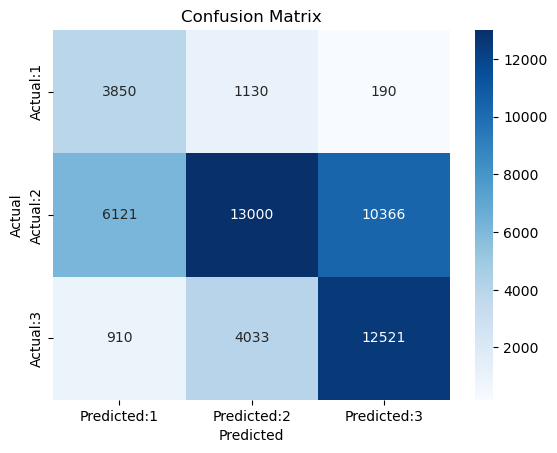

              precision    recall  f1-score   support

           1       0.35      0.74      0.48      5170
           2       0.72      0.44      0.55     29487
           3       0.54      0.72      0.62     17464

    accuracy                           0.56     52121
   macro avg       0.54      0.63      0.55     52121
weighted avg       0.62      0.56      0.56     52121

AdaBoost Classifier
Model Performance for Training Set
F1 Micro-Averaged Score: 0.6344
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.5635




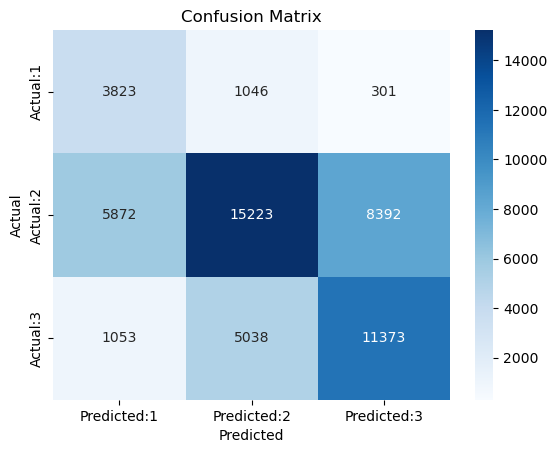

              precision    recall  f1-score   support

           1       0.36      0.74      0.48      5170
           2       0.71      0.52      0.60     29487
           3       0.57      0.65      0.61     17464

    accuracy                           0.58     52121
   macro avg       0.55      0.64      0.56     52121
weighted avg       0.63      0.58      0.59     52121

DecisionTree Classifier
Model Performance for Training Set
F1 Micro-Averaged Score: 0.9938
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.5836




In [14]:
results_undersample_datasets = train_and_evaluate(X_train_under_sample, y_train_under_sample)

#### Results

In [15]:
results_undersample_datasets

,Model Name,Train Micro Averaged F1-Score,Val Micro Averaged F1-Score,Time
0,Random Forest,0.993769,0.618292,11.95
1,Gradient Boosting Classifier,0.674468,0.607855,83.39
3,DecisionTree Classifier,0.993786,0.583623,1.07
2,AdaBoost Classifier,0.634376,0.563516,7.21


### 3. For oversampled Datasets

#### Train the models

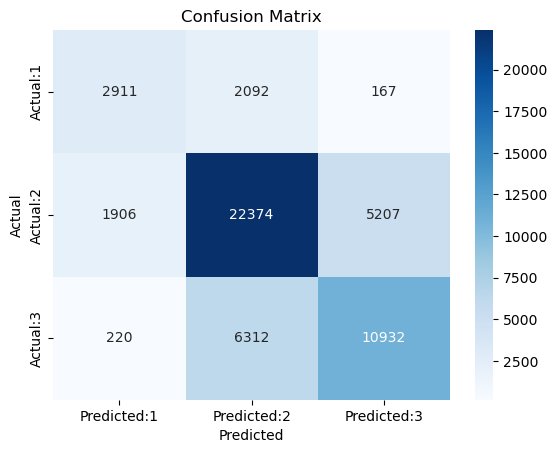

              precision    recall  f1-score   support

           1       0.58      0.56      0.57      5170
           2       0.73      0.76      0.74     29487
           3       0.67      0.63      0.65     17464

    accuracy                           0.69     52121
   macro avg       0.66      0.65      0.65     52121
weighted avg       0.69      0.69      0.69     52121

Random Forest
Model Performance for Training Set
F1 Micro-Averaged Score: 0.9884
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.6949




In [ ]:
results_oversample_datasets = train_and_evaluate(X_train_over_sample, y_train_over_sample)

#### Results

In [ ]:
results_oversample_datasets

### 4. For SMOTE 

#### Train the models

In [ ]:
results_smote = train_and_evaluate(X_train_smote, y_train_smote)

#### Results

In [ ]:
results_smote

## Conclusion:
> We can see that the algorithms performed well on SMOTE datasets. So,we will now perform hyperparameter tuning on those datasets for different algorithms

# Hyperparameter Tuning

In [ ]:
#pip install mlflow

In [ ]:
#pip install pyngrok

In [ ]:
RANDOM_SEED = 42

In [ ]:
import mlflow
from sklearn.model_selection import GridSearchCV
import subprocess
from pyngrok import ngrok

In [ ]:
experiment_name = "HouseDamageExperiment"

experiment = mlflow.get_experiment_by_name(experiment_name)

if experiment is None:
    experiment = mlflow.create_experiment(experiment_name)    
    experiment_id = experiment.experiment_id
else:
    experiment_id = experiment.experiment_id


In [ ]:
mlflow.set_experiment(experiment_name)

## Helper Functions

In [ ]:
def run_mlflow_ui():
    proc = subprocess.Popen(["mlflow", "ui"])
    public_url = ngrok.connect(addr = "5000")
    print("MlFlow UI can be accessed at :", public_url)

In [ ]:
def plot_confusion_matrix(true, predicted):
    """
    Generate the confusion matrix and classification report
    """
    cm = confusion_matrix(true, predicted)
    cr = classification_report(true, predicted)
    conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:1','Predicted:2','Predicted:3'],
                                             index=['Actual:1','Actual:2','Actual:3'])
    # confusion matrix in heatmap
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    print(cr) 
    f1_micro = f1_score(true, predicted, average='micro')
    return f1_micro

In [ ]:
def evaluate_model(model):
    
    print("Evaluating Model")
    
    # Make predictions
    y_train_pred = model.predict(X_train_smote)
    y_val_pred = model.predict(X_val)
    
    # Calculate micro averaged f1-score
    f1_micro_train = f1_score(y_train_smote, y_train_pred, average='micro')
    f1_micro_val = f1_score(y_val, y_val_pred, average='micro')
    
    print("Finished Evaluating Model")
    
    return f1_micro_train, f1_micro_val, y_train_pred, y_val_pred

In [ ]:
def grid_search_cv(estimator, param_grid):
    
    print("Performing GridSearchCv")
    
    grid_search = GridSearchCV(estimator=estimator, param_grid=param_grid)
    grid_search.fit(X_train_smote, y_train_smote)
    best_params = grid_search.best_params_
    print("Finished GridSearchCv")
    return best_params

In [ ]:
def train_model(estimator, best_params, estimator_name):
    
    print("Training Model")
    
    best_estimator = estimator.set_params(**best_params)
    
    best_estimator.fit(X_train_smote, y_train_smote)
    
    f1_micro_train, f1_micro_val, _ , y_val_pred = evaluate_model(best_estimator)
    
    log_results(best_params, best_estimator, estimator_name, f1_micro_train, f1_micro_val)
    
    print("Successfull")
    
    return y_val_pred

In [ ]:
def log_results(best_params, estimator, estimator_name, f1_micro_train, f1_micro_val):
    
    print("Logging Results")
    
    with mlflow.start_run():
        
        mlflow.sklearn.log_model(estimator, estimator_name)
        
        mlflow.log_metric("f1_micro_train", f1_micro_train)
        mlflow.log_metric("f1_micro_val", f1_micro_val)
        
        # Set best params
        for param_name, param_value in best_params.items():
            mlflow.log_param(param_name, param_value) 
    print("Finished Logging Results")

In [ ]:
feature_names = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'count_families', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other', 'land_surface_condition_n',
       'land_surface_condition_o', 'land_surface_condition_t',
       'foundation_type_h', 'foundation_type_i', 'foundation_type_r',
       'foundation_type_u', 'foundation_type_w', 'roof_type_n', 'roof_type_q',
       'roof_type_x', 'ground_floor_type_f', 'ground_floor_type_m',
       'ground_floor_type_v', 'ground_floor_type_x', 'ground_floor_type_z',
       'other_floor_type_j', 'other_floor_type_q', 'other_floor_type_s',
       'other_floor_type_x', 'position_j', 'position_o', 'position_s',
       'position_t', 'plan_configuration_a', 'plan_configuration_c',
       'plan_configuration_d', 'plan_configuration_f', 'plan_configuration_m',
       'plan_configuration_n', 'plan_configuration_o', 'plan_configuration_q',
       'plan_configuration_s', 'plan_configuration_u',
       'legal_ownership_status_a', 'legal_ownership_status_r',
       'legal_ownership_status_v', 'legal_ownership_status_w']

## 0. Multinomial Logistic Regression

In [ ]:
# Instantiating the model
estimator = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Setting parameter grid
softmax_params = {
    'C':  [0.001, 0.01, 0.1,1],
    'penalty': ['l2']
}

In [ ]:
estimator_name = "softmax_regressor"

best_params = grid_search_cv(estimator, softmax_params)

y_val_pred = train_model(estimator, best_params, estimator_name)

f1_micro_score = plot_confusion_matrix(y_val, y_val_pred)

print(f"F1 Micro Averaged Score = {f1_micro_score}")

### Feature Importance

In [ ]:
softmax_model = LogisticRegression().set_params(**best_params)
softmax_model.fit(X_train_smote, y_train_smote)


In [ ]:
# Get the feature importances
importances = np.abs(softmax_model.coef_).sum(axis=0)
importances /= np.sum(importances)

# Top 10 importances
importances = importances[:10]

indices = np.argsort(importances)[::-1]


important_feature = []
for i in indices:
    important_feature.append(feature_names[i])
    
plt.title("Feature Importances")
plt.bar(range(10), importances[indices])
plt.xticks(range(10), important_feature, rotation=90)
plt.show()

## Conclusion:

Give conclusion

In [ ]:
run_mlflow_ui()

## 1. Decision Tree Classifier

In [ ]:
decision_tree_params = {
    'max_depth': [2,4,6,8,10],
    'min_samples_split': [2,4,6,8,10]
}

In [ ]:
estimator = DecisionTreeClassifier()

estimator_name = "decision_tree"

best_params = grid_search_cv(estimator, decision_tree_params)

y_val_pred = train_model(estimator, best_params, estimator_name)

f1_micro_score = plot_confusion_matrix(y_val, y_val_pred)

print(f"F1 Micro Averaged Score = {f1_micro_score}")

## Feature Importance

In [ ]:
decision_tree_model = DecisionTreeClassifier().set_params(**best_params)
decision_tree_model.fit(X_train_smote, y_train_smote)


In [ ]:
# Get the feature importances
importance = decision_tree_model.feature_importances_

importance = importance[:10]

sorted_idx = importance.argsort()[::-1]

important_feature = []
for i in sorted_idx:
    important_feature.append(feature_names[i])

# Create a bar plot of the feature importances
plt.bar(range(10), importance[sorted_idx])
plt.xticks(range(10), important_feature , rotation=90)
plt.title("Feature Importance")
plt.show()

## Conclusion:

Give conclusion

## 2. Random Forest

In [ ]:
param_grid_random_forest = {
    'max_depth': [10],
    'max_features': ['sqrt'],
    'random_state': RANDOM_SEED
}

In [ ]:
estimator = RandomForestClassifier()

estimator_name = "random_forest"

best_params = grid_search_cv(estimator, decision_tree_params)

y_val_pred = train_model(estimator, best_params, estimator_name)

f1_micro_score = plot_confusion_matrix(y_val, y_val_pred)

print(f"F1 Micro Averaged Score = {f1_micro_score}")

## 3.  Gradient Boosting Classifier

## 4. XGBoost Classifier